In [1]:
import os
import nibabel as nib
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

# Path to the directory containing the NIfTI files
nii_dir_path = "../data/flattened_nii_files_2020"



In [2]:
def Img_proc(image, _lambda = -0.8):
    I_img = image
    I_img_norm = (I_img - np.min(I_img)) / (np.max(I_img) - np.min(I_img))
    
    # Step 1: Compute IMG1
    max_I_img = np.max(I_img_norm)
    IMG1 = (max_I_img / np.log(max_I_img + 1)) * np.log(I_img_norm + 1)
    
    # Step 2: Compute IMG2
    IMG2 = 1 - np.exp(-I_img_norm)
    
    # Step 3: Compute IMG3
    IMG3 = (IMG1 + IMG2) / (_lambda + (IMG1 * IMG2))
    
    # Step 4: Compute IMG4
    IMG4 = erf(_lambda * np.arctan(np.exp(IMG3)) - 0.5 * IMG3)
    
    # Step 5: Compute IMG5 (Normalization)
    min_IMG4 = np.min(IMG4)
    max_IMG4 = np.max(IMG4)
    IMG5 = (IMG4 - min_IMG4) / (max_IMG4 - min_IMG4)
    
    return IMG5


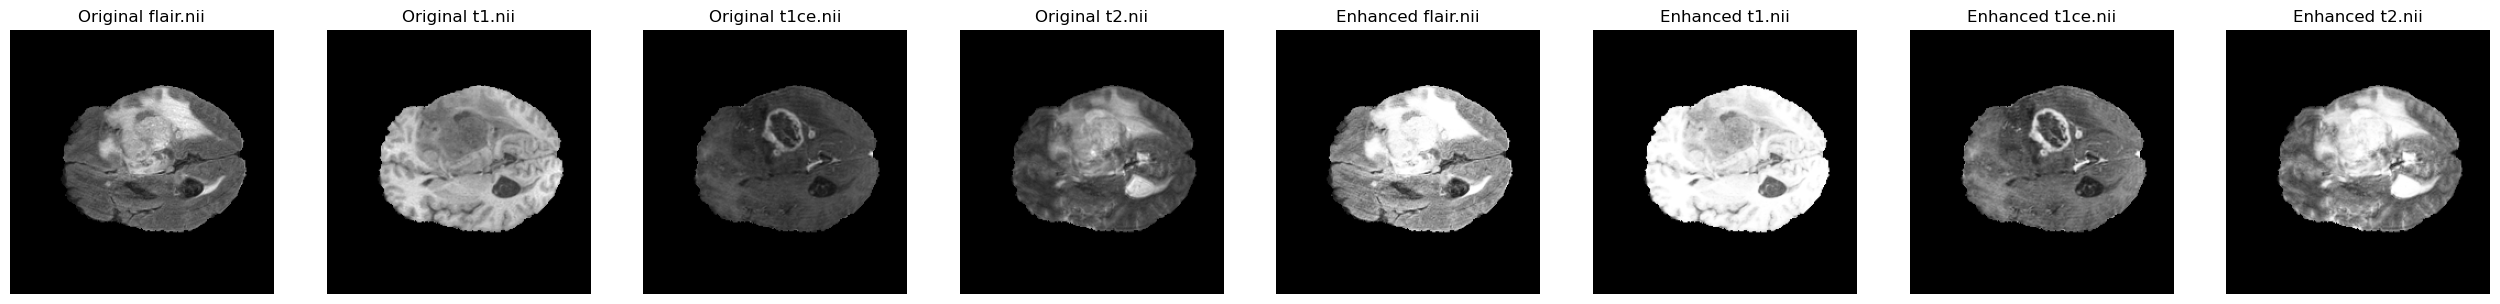

In [5]:
# Initialize plot for 2 rows and 4 columns
fig, axes = plt.subplots(1, 8, figsize=(32, 8))  # 2 rows, 4 columns
axes = axes.reshape(2, -1)  # Reshape axes array into 2 rows for easier indexing

# File counter
file_count = 0

# Iterate over all files in the directory
for filename in os.listdir(nii_dir_path):
    if filename.startswith("BraTS20_Training_001") and not filename.endswith("seg.nii"):
        # Extract the subject ID and photography type
        subject_id = filename.split("_")[2]
        photography = filename.split("_")[3]
        
        # Construct full path to the file
        file_path = os.path.join(nii_dir_path, filename)
        
        # Load the NIfTI file
        nii_data = nib.load(file_path)
        mri_data = nii_data.get_fdata()
        
        # Ensure the slice index is within the data dimensions
        slice_index = 70
        if slice_index < 0 or slice_index >= mri_data.shape[2]:
            print(f"Slice index {slice_index} is out of range for the file {filename}")
            continue
        
        # Extract the slice
        mri_slice = mri_data[:, :, slice_index]
        
        # Process the image
        processed_image = Img_proc(mri_slice)
        
        # Plot original image in the first row
        ax_original = axes[0, file_count % 4]
        ax_original.imshow(mri_slice, cmap='gray')
        ax_original.set_title(f"Original {photography}")
        ax_original.axis("off")
        
        # Plot enhanced image in the second row
        ax_enhanced = axes[1, file_count % 4]
        ax_enhanced.imshow(processed_image, cmap='gray')
        ax_enhanced.set_title(f"Enhanced {photography}")
        ax_enhanced.axis("off")
        
        file_count += 1
        
            

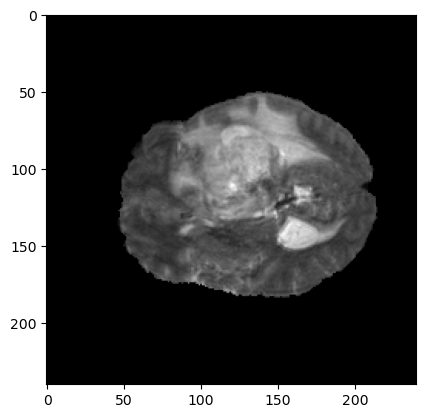

In [4]:
plt.imshow(mri_slice, cmap='gray')